# RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.
(Source-Google)

A particular company who wants to target customers has to be sure that it is targetting the appropriate customers so that its campaign is effective.

The 3 main factors which are of focus here are

Recency- When was the last time the customer had purchased? Here Recency has been measured in days

Frequency-How many transactions did the customer make?

Monetory Value- How much money did the customer spend? Here we have taken the average money the customer had spent in each transaction.

# About the dataset
The data is about transactions in a stationary and gifts store.
The data has been obtained from a text file. Relevant preprocessing has been done in the later steps so that it could be converted to a dataframe. Each row denotes a transaction showing the customer id, amount of money involved and the date of transaction. 

In [165]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re
from datetime import datetime

# Data Preprocessing

In [166]:
#Here we read the file
with open("purchases.txt","r") as f:
    a=f.readlines()

In [167]:
#Here we convert the data from text to a list containing the necessary informations
d=[]
for i in a:
    s=re.split(r"[\t\n]",i)[:-1]
    d.append(s)

In [168]:
d

[['760', '25', '2009-11-06'],
 ['860', '50', '2012-09-28'],
 ['1200', '100', '2005-10-25'],
 ['1420', '50', '2009-07-09'],
 ['1940', '70', '2013-01-25'],
 ['1960', '40', '2013-10-29'],
 ['2620', '30', '2006-03-09'],
 ['3050', '50', '2007-04-12'],
 ['3120', '150', '2006-11-08'],
 ['3260', '45', '2010-10-20'],
 ['3510', '35', '2013-05-04'],
 ['3970', '30', '2007-06-07'],
 ['4000', '20', '2005-11-25'],
 ['4180', '20', '2010-09-22'],
 ['4390', '30', '2011-04-15'],
 ['4750', '60', '2013-12-02'],
 ['4840', '30', '2005-10-14'],
 ['4910', '15', '2006-12-13'],
 ['4950', '50', '2010-05-19'],
 ['4970', '30', '2006-12-01'],
 ['5250', '50', '2005-12-20'],
 ['5480', '100', '2014-06-06'],
 ['5990', '30', '2006-03-17'],
 ['6240', '100', '2006-11-09'],
 ['6390', '15', '2005-10-25'],
 ['6570', '30', '2012-11-10'],
 ['6600', '50', '2005-09-23'],
 ['6690', '20', '2010-03-10'],
 ['6690', '15', '2010-11-04'],
 ['6690', '15', '2013-12-10'],
 ['6710', '80', '2013-05-03'],
 ['6940', '30', '2013-12-31'],
 ['700

In [169]:
len(d)

51243

In [170]:
df=pd.DataFrame(d)

In [171]:
df.columns=["Customer_id","Purchase_Amt","Date"]

In [172]:
df

,Customer_id,Purchase_Amt,Date
0,760,25,2009-11-06
1,860,50,2012-09-28
2,1200,100,2005-10-25
3,1420,50,2009-07-09
4,1940,70,2013-01-25
...,...,...,...
51238,163230,30,2011-11-12
51239,154410,100,2013-11-15
51240,189270,30,2014-12-23
51241,173810,30,2015-05-28


In [173]:
#we are converting the relevant text to datetime format
df.Date=pd.to_datetime(df.Date)

In [174]:
df

,Customer_id,Purchase_Amt,Date
0,760,25,2009-11-06
1,860,50,2012-09-28
2,1200,100,2005-10-25
3,1420,50,2009-07-09
4,1940,70,2013-01-25
...,...,...,...
51238,163230,30,2011-11-12
51239,154410,100,2013-11-15
51240,189270,30,2014-12-23
51241,173810,30,2015-05-28


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer_id   51243 non-null  object        
 1   Purchase_Amt  51243 non-null  object        
 2   Date          51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 800.7+ KB


The date has been converted to desired format but the necessary numerical information are still in text format

In [176]:
df["Customer_id"]=df["Customer_id"].apply(lambda x:float(x))
df["Purchase_Amt"]=df["Purchase_Amt"].apply(lambda x:float(x))

We have converted the information to our desired datatypes

In [177]:
df1=df.copy()

In [178]:
df1.index=df1.Date

In [179]:
df1

,Customer_id,Purchase_Amt,Date
Date,,,
2009-11-06,760.0,25.0,2009-11-06
2012-09-28,860.0,50.0,2012-09-28
2005-10-25,1200.0,100.0,2005-10-25
2009-07-09,1420.0,50.0,2009-07-09
2013-01-25,1940.0,70.0,2013-01-25
...,...,...,...
2011-11-12,163230.0,30.0,2011-11-12
2013-11-15,154410.0,100.0,2013-11-15
2014-12-23,189270.0,30.0,2014-12-23


# Doing some visualizations

In [180]:
df1["Purchase_Amt"].describe()

count    51243.000000
mean        62.337195
std        156.606801
min          5.000000
25%         25.000000
50%         30.000000
75%         60.000000
max       4500.000000
Name: Purchase_Amt, dtype: float64

<AxesSubplot:xlabel='Date'>

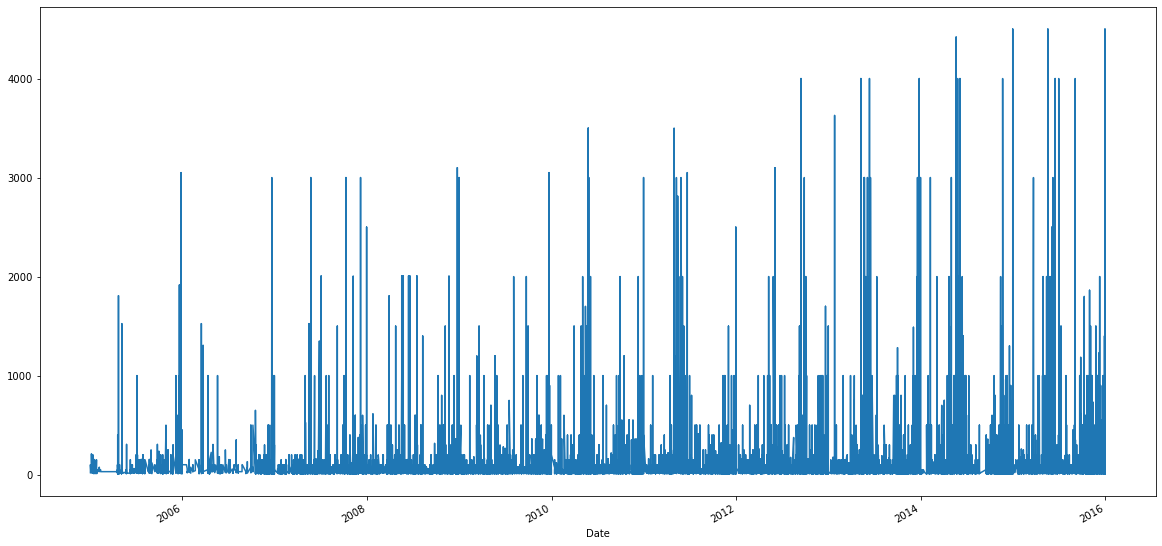

In [181]:
df1["Purchase_Amt"].plot()

This looks pretty clumsy.We are resampling to get a better idea

<AxesSubplot:xlabel='Date'>

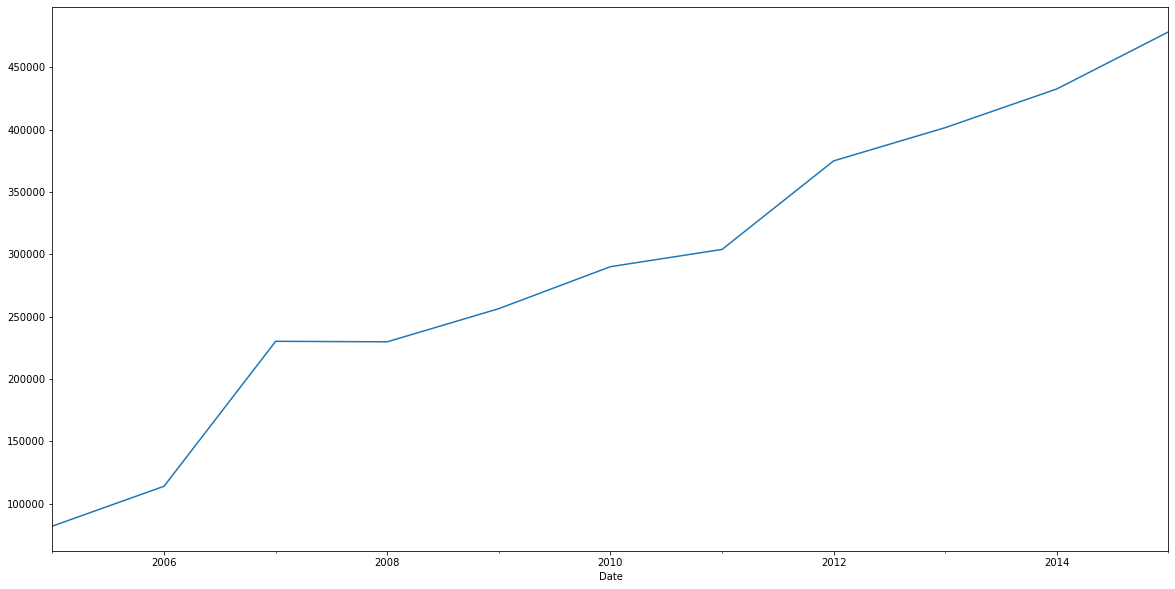

In [182]:
df1.resample("Y")["Purchase_Amt"].sum().plot()

We can see that the total purchase amount involved in transactions have shown an increase every year

In [183]:
df1["Year"]=df1.Date.dt.year

<AxesSubplot:xlabel='Year'>

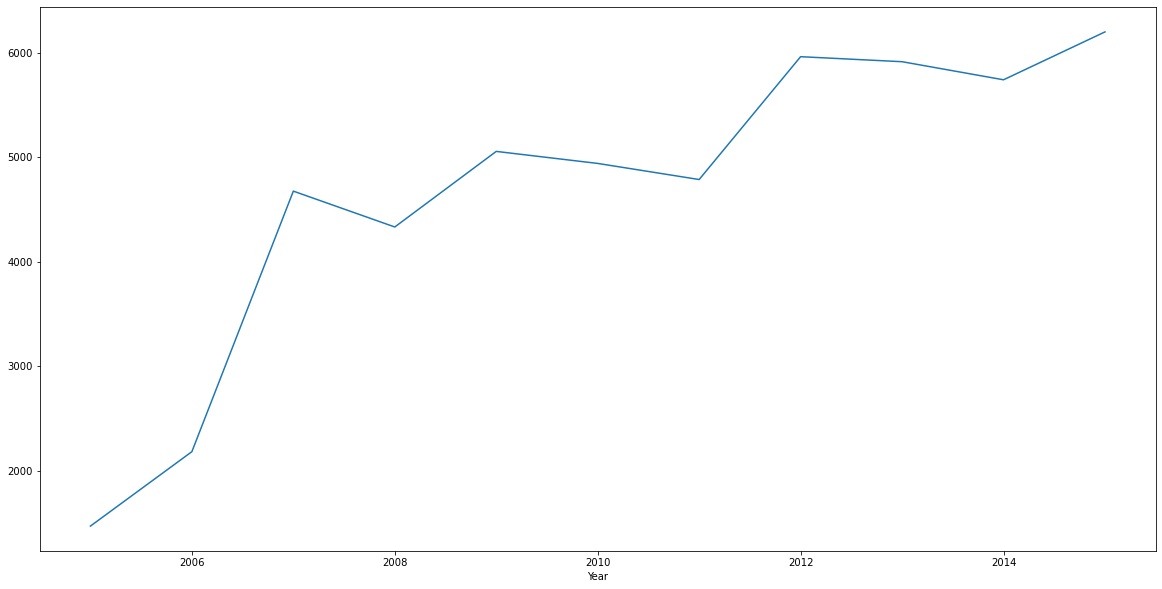

In [184]:
df1.groupby("Year")["Year"].count().plot()

The number of transactions each year show a somewhat zigzag pattern, increasing and then showing a slight decrease

<AxesSubplot:xlabel='Year'>

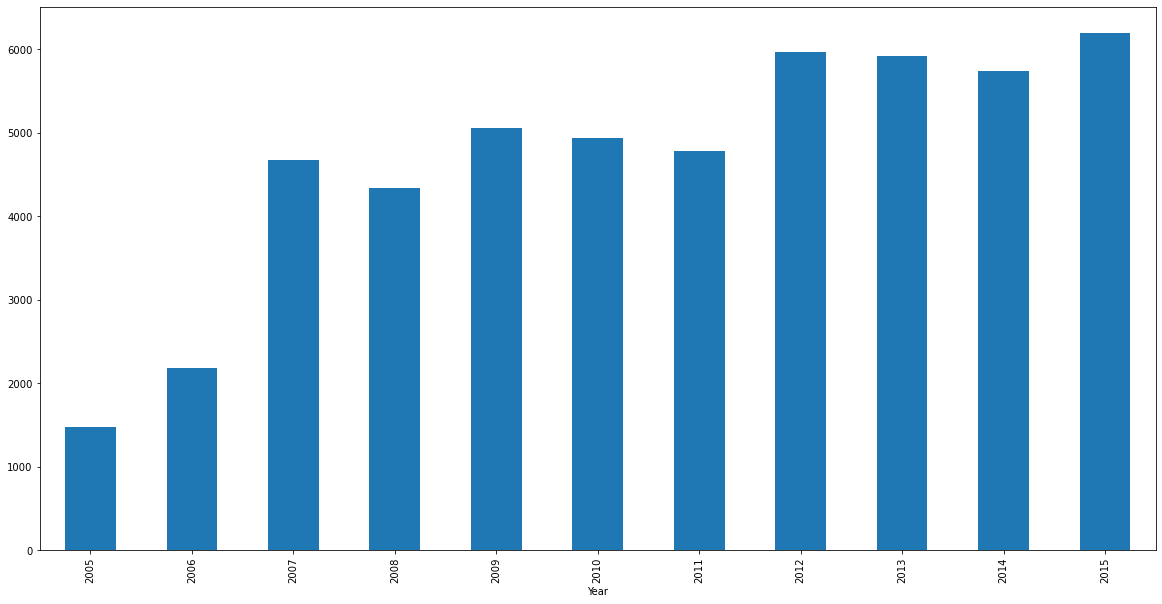

In [185]:
df1.groupby("Year")["Year"].count().plot.bar()

Barplot has been plotted to get the exact year

In [186]:
df1.groupby(["Customer_id","Year"])["Customer_id"].count()

Customer_id  Year
10.0         2005    1
80.0         2005    1
             2007    1
             2009    1
             2011    1
                    ..
263820.0     2015    1
263870.0     2015    1
263880.0     2015    1
263890.0     2015    1
264200.0     2015    1
Name: Customer_id, Length: 44966, dtype: int64

We counted the number of transactions a particular customer made in each year

<AxesSubplot:xlabel='Year'>

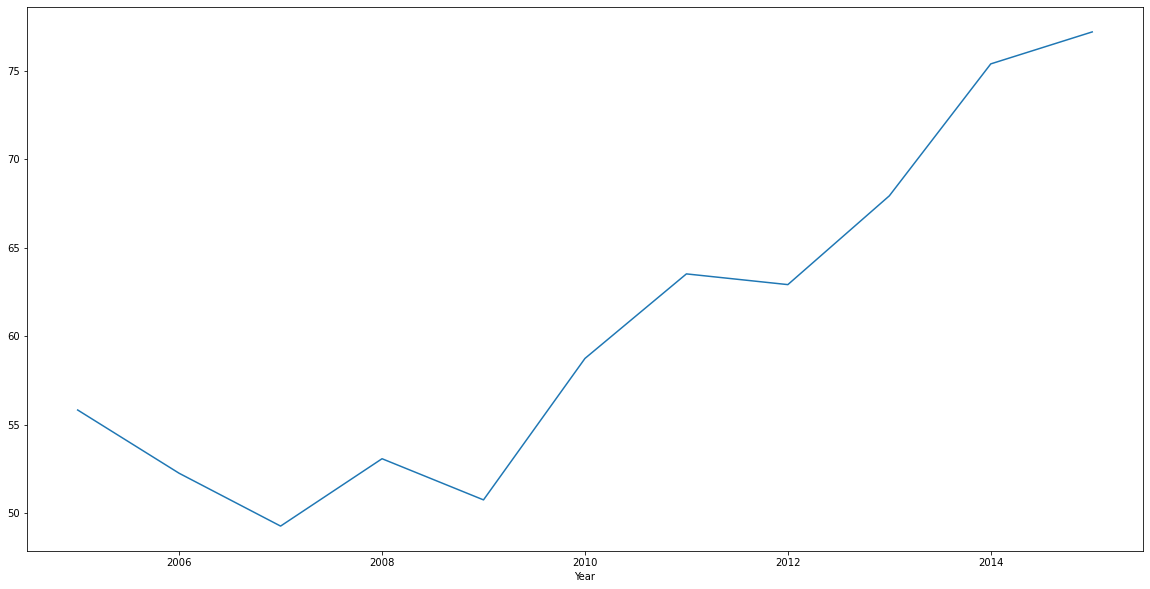

In [187]:
df1.groupby("Year")["Purchase_Amt"].mean().plot()

Mean Purchase Amount has shown a drop in some years.One possible reason is excessive discounts 

# Finding out the recency,frequency and monetory value

In [188]:
customer=df1.groupby(["Customer_id"]).agg({"Customer_id":"count","Purchase_Amt":"mean","Date":"max"})

Here we have grouped the data by CustomerId. And then we have found the number of transactions involved in that customer id,the mean Purchase Amount and the latest date of purchase

In [189]:
customer

,Customer_id,Purchase_Amt,Date
Customer_id,,,
10.0,1,30.000000,2005-07-08
80.0,7,71.428571,2015-01-23
90.0,10,115.800000,2013-12-04
120.0,1,20.000000,2012-03-01
130.0,2,50.000000,2007-11-14
...,...,...,...
263820.0,1,10.000000,2015-12-31
263870.0,1,50.000000,2015-08-19
263880.0,1,20.000000,2015-11-28


In [190]:
#This is the function that we will use to get the number of days between the latest date of purchase and 2016/1/1
def d(date):
    return(datetime(2016,1,1)-date).days

In [191]:
customer["Recency"]=customer["Date"].apply(d)

In [192]:
customer.columns=["no_of_transactions","Average Value","Last visited","Recency"]

In [193]:
customer

,no_of_transactions,Average Value,Last visited,Recency
Customer_id,,,,
10.0,1,30.000000,2005-07-08,3829
80.0,7,71.428571,2015-01-23,343
90.0,10,115.800000,2013-12-04,758
120.0,1,20.000000,2012-03-01,1401
130.0,2,50.000000,2007-11-14,2970
...,...,...,...,...
263820.0,1,10.000000,2015-12-31,1
263870.0,1,50.000000,2015-08-19,135
263880.0,1,20.000000,2015-11-28,34


In [194]:
customer.sort_values("no_of_transactions",ascending=False)

,no_of_transactions,Average Value,Last visited,Recency
Customer_id,,,,
9720.0,45,44.555556,2015-12-03,29
109370.0,41,16.951220,2015-12-31,1
119430.0,38,14.760526,2015-03-06,301
10720.0,37,26.216216,2015-11-28,34
10640.0,34,16.564706,2015-11-26,36
...,...,...,...,...
140980.0,1,15.000000,2010-05-25,2047
141020.0,1,10.000000,2010-05-26,2046
141050.0,1,40.000000,2010-05-26,2046


18417 unique customers have been identified

In [195]:
c=customer.iloc[:,[0,1,-1]]

In [196]:
c.columns=["Frequency","Monetory_Value","Recency"]

In [197]:
c

,Frequency,Monetory_Value,Recency
Customer_id,,,
10.0,1,30.000000,3829
80.0,7,71.428571,343
90.0,10,115.800000,758
120.0,1,20.000000,1401
130.0,2,50.000000,2970
...,...,...,...
263820.0,1,10.000000,1
263870.0,1,50.000000,135
263880.0,1,20.000000,34


In [198]:
c.describe()

,Frequency,Monetory_Value,Recency
count,18417.000000,18417.000000,18417.000000
mean,2.782375,57.792985,1253.037900
std,2.936888,154.360109,1081.437868
min,1.000000,5.000000,1.000000
25%,1.000000,21.666667,244.000000
50%,2.000000,30.000000,1070.000000
75%,3.000000,50.000000,2130.000000
max,45.000000,4500.000000,4014.000000


# Making histograms

<AxesSubplot:>

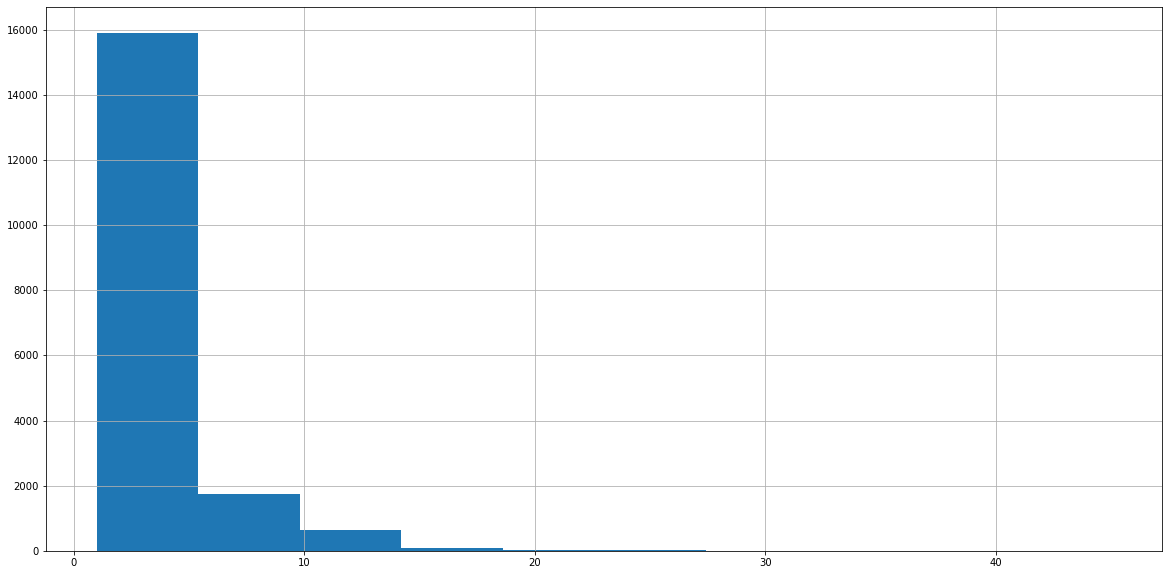

In [199]:
c["Frequency"].hist()

<AxesSubplot:>

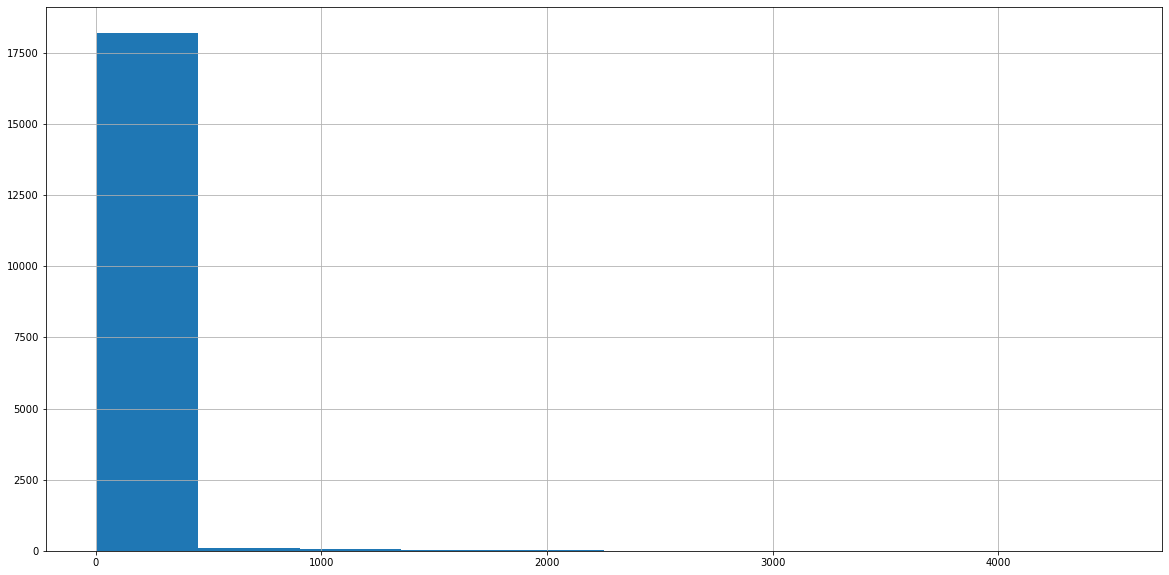

In [200]:
c["Monetory_Value"].hist()

<AxesSubplot:>

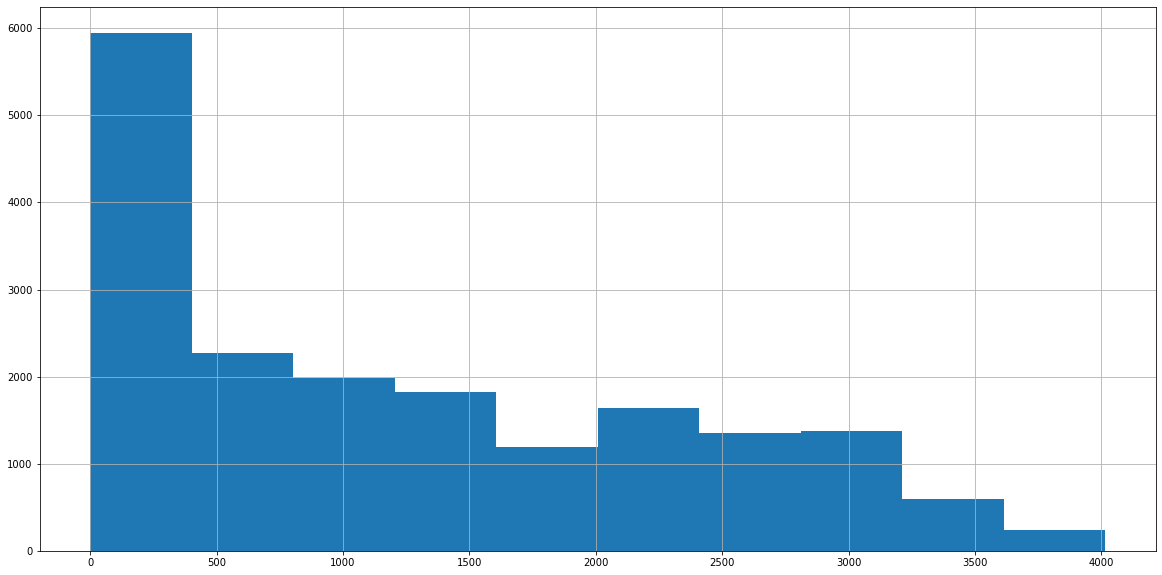

In [201]:
c["Recency"].hist()

# Making boxplots

<AxesSubplot:xlabel='Frequency'>

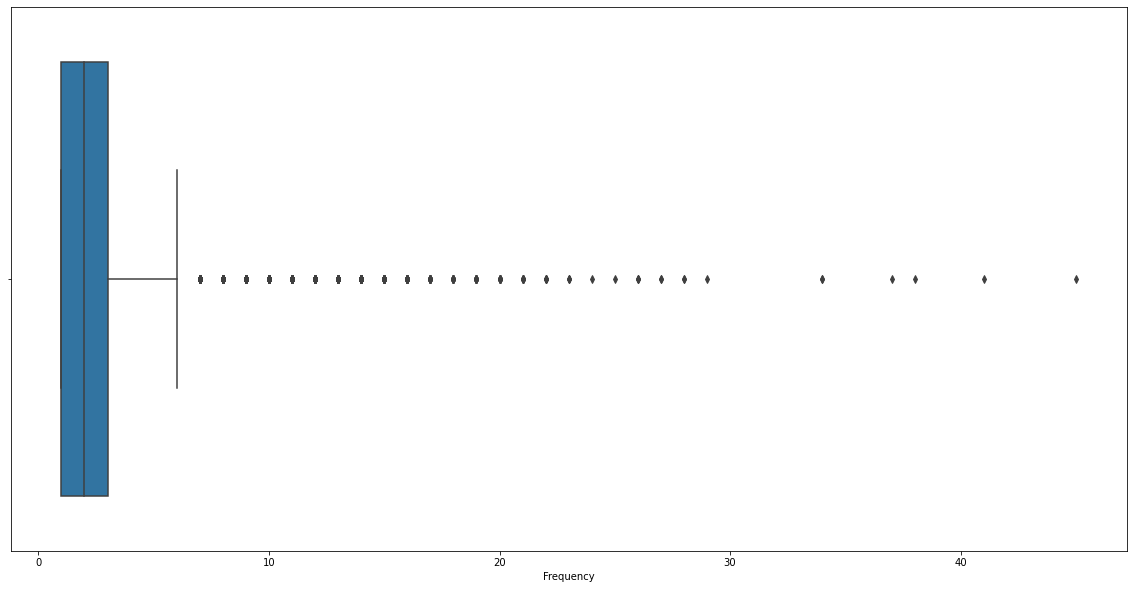

In [202]:
sns.boxplot(x="Frequency",data=c)

<AxesSubplot:xlabel='Monetory_Value'>

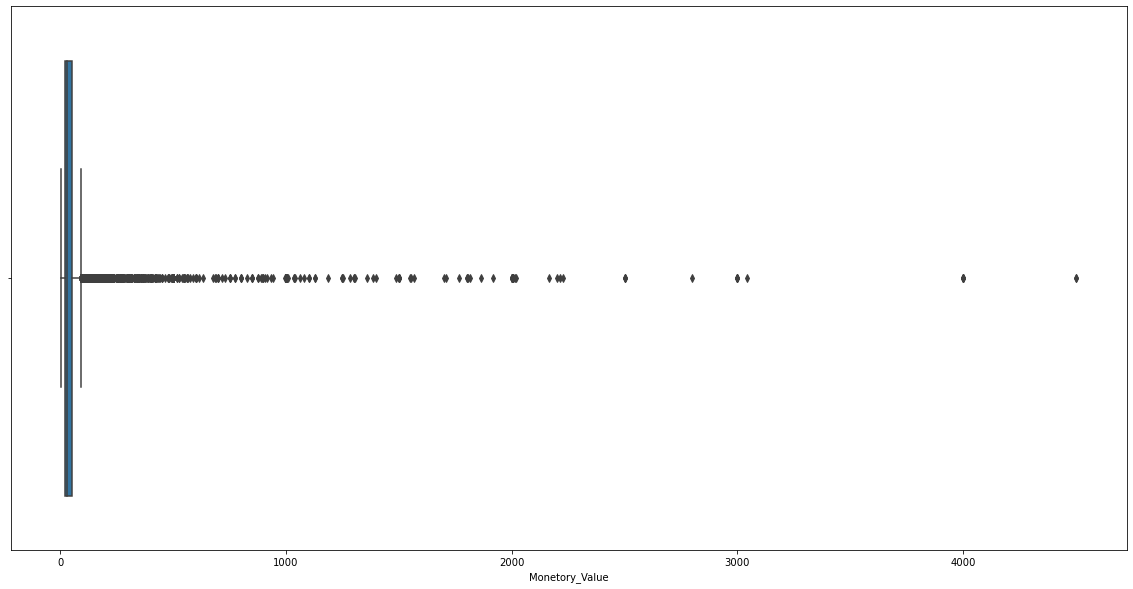

In [203]:
sns.boxplot(x="Monetory_Value",data=c)

<AxesSubplot:xlabel='Recency'>

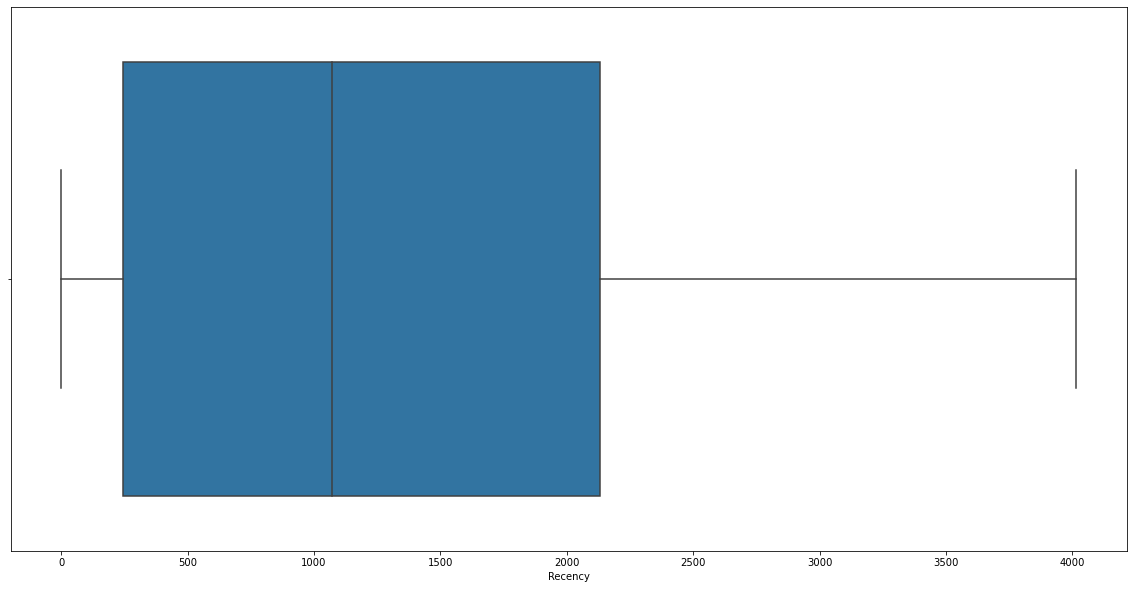

In [204]:
sns.boxplot(x="Recency",data=c)

# Eliminating customers who have almost no chance of returning

In [205]:
c.head()

,Frequency,Monetory_Value,Recency
Customer_id,,,
10.0,1,30.000000,3829
80.0,7,71.428571,343
90.0,10,115.800000,758
120.0,1,20.000000,1401
130.0,2,50.000000,2970


In [206]:
c=c[c.Recency<=800]

Here we are eliminating those customers who have'nt visited to store for almost 2 years, since it is almost impossible to get them back.

In [207]:
len(c)

8196

# Calculating scores

In [208]:
stat=c.describe().loc["25%":"75%"]

In [209]:
stat

,Frequency,Monetory_Value,Recency
25%,1.0,28.75,41.0
50%,3.0,37.50,178.0
75%,6.0,60.00,420.0


In [210]:
#we will be using this dictionary to assign scores
s1=stat.to_dict()

In [211]:
s1

{'Frequency': {'25%': 1.0, '50%': 3.0, '75%': 6.0},
 'Monetory_Value': {'25%': 28.75, '50%': 37.5, '75%': 60.0},
 'Recency': {'25%': 41.0, '50%': 178.0, '75%': 420.0}}

In [212]:
p="25%"
q="50%"
r="75%"
freq=s1["Frequency"]
mval=s1["Monetory_Value"]
rval=s1["Recency"]

In [213]:
def score_calculator1(row):
    fscore=0
    mscore=0
    rscore=0
    f=row[0]
    if(f<=freq[p]):
        fscore=1
    elif(f<=freq[q]):
        fscore=2
    elif(f<=freq[r]):
        fscore=3
    else:
        fscore=4
        
    m=row[1]
    if(m<=mval[p]):
        mscore=1
    elif(m<=mval[q]):
        mscore=2
    elif(m<=mval[r]):
        mscore=3
    else:
        mscore=4
        
    r1=row[2]
    if(r1<=rval[p]):
        rscore=3
    elif(r1<=rval[q]):
        rscore=2
    else:
        rscore=1
    score=fscore+mscore+rscore
    return score

In [214]:
d=pd.Series(c.values.tolist(),index=c.index)

In [215]:
d

Customer_id
80.0         [7.0, 71.42857142857143, 343.0]
90.0                    [10.0, 115.8, 758.0]
240.0                    [4.0, 16.25, 463.0]
290.0        [7.0, 77.85714285714286, 787.0]
480.0       [12.0, 60.833333333333336, 21.0]
                          ...               
263820.0                    [1.0, 10.0, 1.0]
263870.0                  [1.0, 50.0, 135.0]
263880.0                   [1.0, 20.0, 34.0]
263890.0                    [1.0, 54.0, 5.0]
264200.0                   [1.0, 500.0, 1.0]
Length: 8196, dtype: object

In [216]:
c["Score"]=d.apply(score_calculator1)

<ipython-input-216-6d5239ed22a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c["Score"]=d.apply(score_calculator1)


In [217]:
c

,Frequency,Monetory_Value,Recency,Score
Customer_id,,,,
80.0,7,71.428571,343,9
90.0,10,115.800000,758,9
240.0,4,16.250000,463,5
290.0,7,77.857143,787,9
480.0,12,60.833333,21,11
...,...,...,...,...
263820.0,1,10.000000,1,5
263870.0,1,50.000000,135,6
263880.0,1,20.000000,34,5


In [218]:
c.sort_values(by="Score",ascending=False)

,Frequency,Monetory_Value,Recency,Score
Customer_id,,,,
64730.0,10,151.000000,15,11
13500.0,15,121.666667,21,11
82870.0,11,104.545455,13,11
13410.0,9,87.777778,1,11
83280.0,8,64.375000,1,11
...,...,...,...,...
235180.0,1,20.000000,330,3
215260.0,1,15.000000,731,3
211100.0,1,10.000000,773,3


In [219]:
c.Score.value_counts()

6     1533
5     1426
7     1279
8     1067
4     1032
9      797
10     443
3      401
11     218
Name: Score, dtype: int64

In [224]:
c[c["Score"]==11]

,Frequency,Monetory_Value,Recency,Score
Customer_id,,,,
480.0,12,60.833333,21,11
1150.0,11,64.090909,10,11
2570.0,9,124.000000,6,11
3610.0,8,93.125000,17,11
3880.0,9,905.555556,1,11
...,...,...,...,...
165450.0,7,65.714286,13,11
181520.0,10,81.500000,22,11
186450.0,7,151.428571,23,11


# Making plots based on scores

<AxesSubplot:xlabel='Score'>

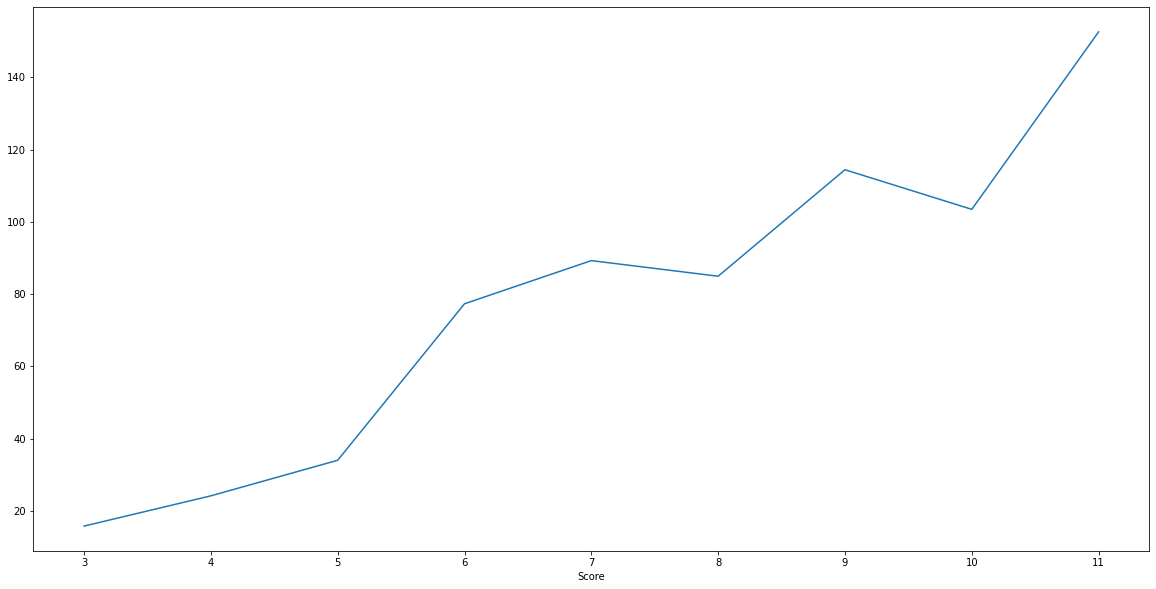

In [221]:
c.groupby("Score")["Monetory_Value"].mean().plot()

<AxesSubplot:xlabel='Score'>

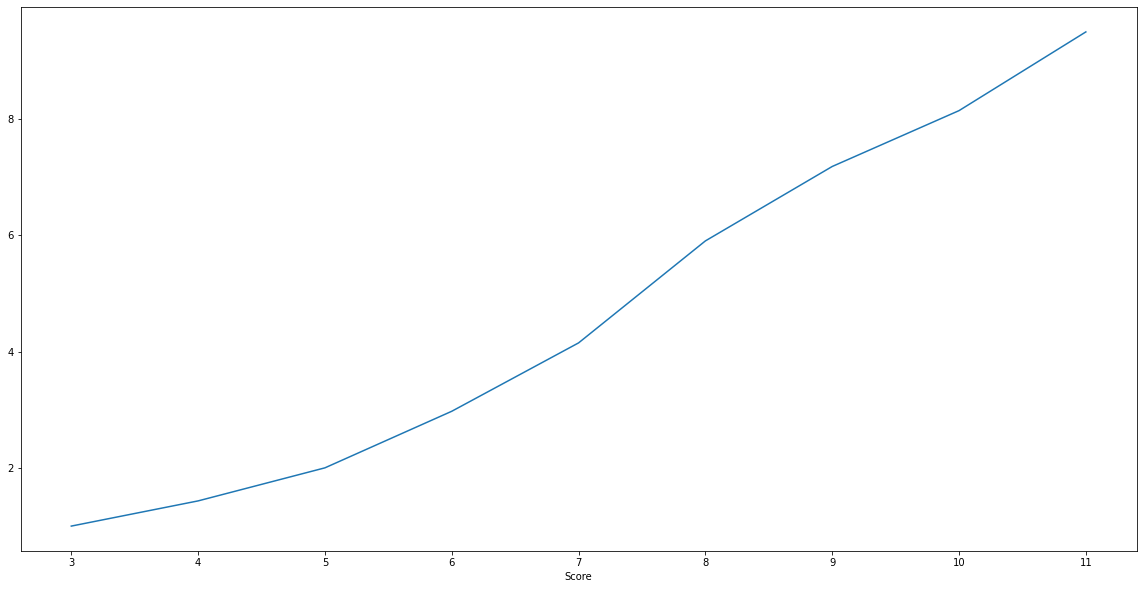

In [222]:
c.groupby("Score")["Frequency"].mean().plot()

<AxesSubplot:xlabel='Score'>

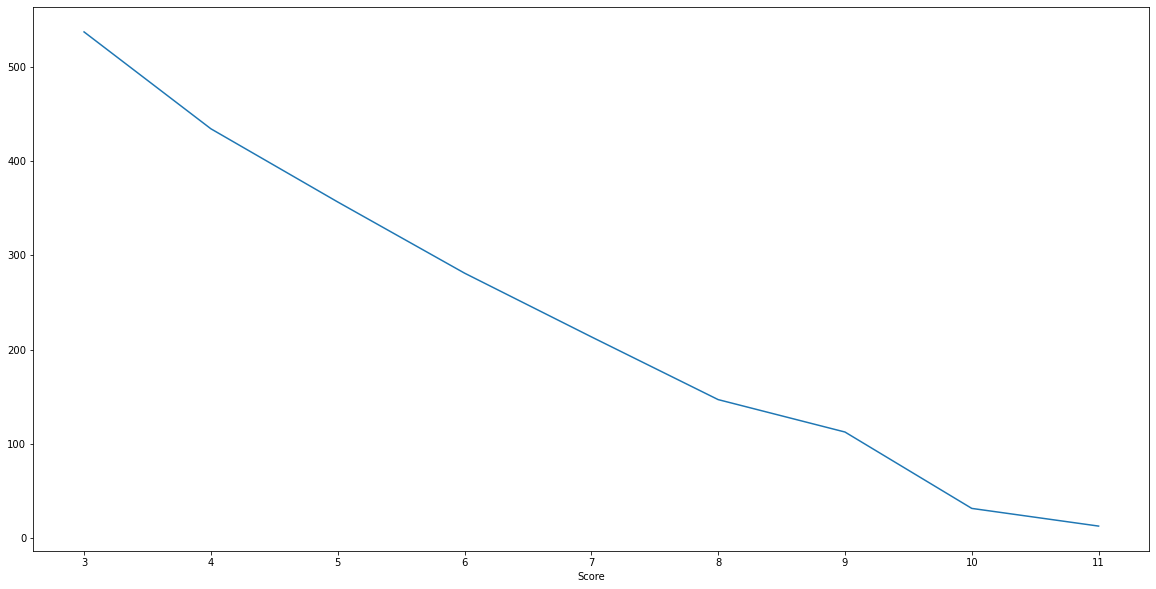

In [223]:
c.groupby("Score")["Recency"].mean().plot()

From the scores which we have calculated here, the people with high scores are very important and people with low scores are the least important. The store can devise various methods to "lure" these customers who have high scores and get them to spend more money. By this way it can increase its profit